In [45]:

+


56+# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/main-folder/train_data/Variety JJ/JJ43L.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ34L.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ52R.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ34R.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ7U.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ58U.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ55L.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ14U.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ4L.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ21R.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ50R.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ33U.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ36U.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ4U.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ43R.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ15L.dng
/kaggle/input/main-folder/train_data/Variety JJ/JJ34U.dng
/kaggle/input/mai

In [20]:
from PIL import Image

img=Image.open('/kaggle/input/imagea/A10L.jpg')
img.size




(585, 585)

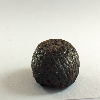

In [21]:
from  tensorflow.keras.preprocessing import image
import tensorflow as tf
img=image.load_img('/kaggle/input/main-folder/train_data/Variety A/A10L.dng',target_size=(100,100))
img.size
img

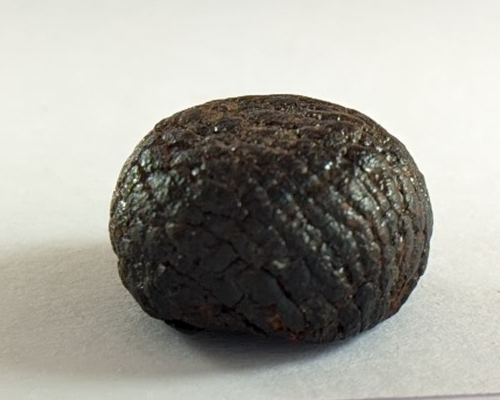

In [22]:
from  tensorflow.keras.preprocessing import image
import tensorflow as tf
img=image.load_img('/kaggle/input/main-folder/train_data/Variety A/A10L.dng')

image_tensor = tf.keras.preprocessing.image.img_to_array(img)
offset_height = 100
offset_width = 100
target_height = 400
target_width = 500
cropped_image = tf.image.crop_to_bounding_box(image_tensor, offset_height, offset_width, target_height, target_width)
cropped_image=image.array_to_img(cropped_image)
cropped_image

In [23]:
cropped_image.size

(500, 400)

In [47]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import os

# Libraries for TensorFlow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models, layers

# Library for Transfer Learning250
from tensorflow.keras.applications import resnet50


In [48]:
main_folder="/kaggle/input/main-folder/train_data"
class_names=os.listdir(main_folder)
print(class_names)

['Variety JJ', 'Variety B', 'Variety A', 'Variety C']


In [49]:
class_names.sort()
class_names

['Variety A', 'Variety B', 'Variety C', 'Variety JJ']

In [27]:
class_names.index('Variety A')

0

In [56]:
x=[]
y=[]


for folder in os.listdir(main_folder):
    image_list=os.listdir(main_folder+"/"+folder)
    for img_name in image_list:
        img=image.load_img(main_folder+"/"+folder+"/"+img_name,target_size=(400,400))
            
    
        img=image.img_to_array(img)
        
        img=resnet50.preprocess_input(img)
        
        x.append(img) # appending image array
        y.append(class_names.index(folder)) # appending class index to the array
        
print("Preparing Training Dataset Completed.")

Preparing Training Dataset Completed.


In [ ]:
print("Summary of default ResNet50 model.\n")
from tensorflow.keras.applications import resnet50
model_resnet=resnet50.ResNet50(weights='imagenet')
model_resnet.summary()

Summary of default ResNet50 model.

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                       

In [ ]:
input_layer=layers.Input(shape=(400,400,3))
resnet_model=resnet50.ResNet50(weights='imagenet',input_tensor=input_layer,include_top=False)
resnet_model.summary()

In [ ]:
last_layer=resnet_model.output
flatten=layers.Flatten()(last_layer) 
output_layer=layers.Dense(4,activation='softmax')(flatten)
model=models.Model(inputs=input_layer,outputs=output_layer)
model.summary()

In [ ]:
for layer in model.layers[:-1]:
    layer.trainable=False
model.summary()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

print("Model compilation completed.")

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
y_test


In [ ]:
# Verifying the output

# Training Dataset
print("Training Dataset")

x=np.array(x_train) # Converting to np arrary to pass to the model
print(x.shape)

y=to_categorical(y_train) # onehot encoding of the labels
# print(y)
print(y.shape)


# Validation Dataset
print("Val")

val_images=np.array(x_test) 
print(val_images.shape)

val_image_label=to_categorical(y_test) # onehot encoding of the labels)
print(val_image_label.shape)

In [ ]:
val_image_label.shape

In [ ]:
model.fit(x,y,epochs=20,batch_size=50,verbose=True,validation_data=(val_images,val_image_label))

print("Fitting the model completed.")

In [ ]:
# This function helps to predict individual image supplied to it
def predict(img_name):
    img=image.load_img(img_name,target_size=(400,400))
    img=image.img_to_array(img)
    plt.imshow(img.astype('int32'))
    plt.show()
    img=resnet50.preprocess_input(img)
    prediction=model.predict(img.reshape(1,400,400,3))
    output=np.argmax(prediction)
    print(class_names[output])

# This function plots the image supplied in array
def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
#     plt.imshow(img) # showing b/w image
    plt.imshow(img.astype('int32'))
    
#     print(*predictions_array)
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)

#     print(predicted_label)
#     print(true_label)

    if predicted_label == true_label: #setting up label color
        color='green' # correct then blue colour
    else:
        color='red' # wrong then red colour
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array), class_names[true_label]), color=color)

# This function plots bar chart supplied in the array data
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    predicted_label=np.argmax(predictions_array)
    true_label=np.argmax(true_label)
#     print(predicted_label)
#     print(true_label)
    if predicted_label == 0:
        predicted_label=1
    if true_label == 0:
        true_label=1
    
    thisplot=plt.bar(range(4), predicted_label, color='seashell')
    plt.ylim([0,1])

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

In [ ]:
img_name="/kaggle/input/main-folder/train_data/Variety JJ/JJ37U.dng"
predict(img_name)

In [ ]:
predictions=[]

for img in val_images:
    img=img.reshape(1,400,400,3)
    predictions.append(model.predict(img))
    

In [ ]:
predictions

In [ ]:
# call the function

# defining parameters to pass to function
i=1# image number 22. You may change value of i for play around
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i,predictions, val_image_label, val_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, val_image_label)
plt.show()

In [ ]:
# Prediction on Validation images

# Declaring variables
num_rows=10
num_cols=15
num_images=num_rows*num_cols

plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)

    plot_image(i,predictions, val_image_label, val_images)
    
    plt.subplot(num_rows, 2*num_cols, 2*i+2)

    plot_value_array(i, predictions, val_image_label)
plt.show()